N-Beats

In [1]:
# fix python path if working locally
# from utils import fix_pythonpath_if_working_locally

# fix_pythonpath_if_working_locally()
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset
from tqdm import tqdm

/home/dev/miniconda3/envs/pf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
for i in tqdm(range(100)):
    continue

100%|██████████| 100/100 [00:00<00:00, 569105.02it/s]


In [2]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

Text(0.5, 1.0, 'Hourly generation hydro run-of-river and poundage')

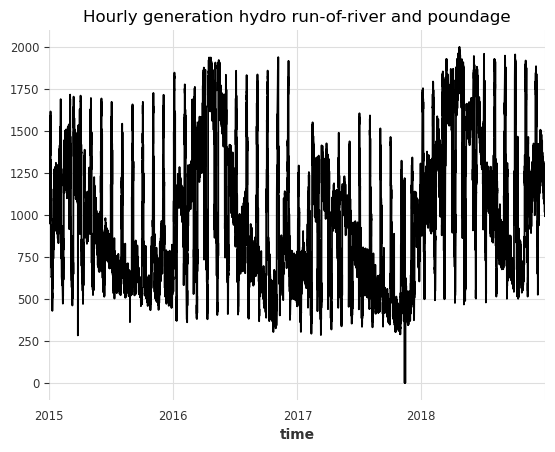

In [3]:
df = EnergyDataset().load().pd_dataframe()
df["generation hydro run-of-river and poundage"].plot()
plt.title("Hourly generation hydro run-of-river and poundage")

In [4]:
#df.to_csv("Energy.csv")
df.describe()

component,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [13]:
df[['generation hydro run-of-river and poundage']]

component,generation hydro run-of-river and poundage
time,
2014-12-31 23:00:00,1051.0
2015-01-01 00:00:00,1009.0
2015-01-01 01:00:00,973.0
2015-01-01 02:00:00,949.0
2015-01-01 03:00:00,953.0
...,...
2018-12-31 18:00:00,1135.0
2018-12-31 19:00:00,1172.0
2018-12-31 20:00:00,1148.0


The usage of MissingValuesFiller?

In [16]:
df.index.astype(str).str.split(" ")

Index([['2014-12-31', '23:00:00'], ['2015-01-01', '00:00:00'],
       ['2015-01-01', '01:00:00'], ['2015-01-01', '02:00:00'],
       ['2015-01-01', '03:00:00'], ['2015-01-01', '04:00:00'],
       ['2015-01-01', '05:00:00'], ['2015-01-01', '06:00:00'],
       ['2015-01-01', '07:00:00'], ['2015-01-01', '08:00:00'],
       ...
       ['2018-12-31', '13:00:00'], ['2018-12-31', '14:00:00'],
       ['2018-12-31', '15:00:00'], ['2018-12-31', '16:00:00'],
       ['2018-12-31', '17:00:00'], ['2018-12-31', '18:00:00'],
       ['2018-12-31', '19:00:00'], ['2018-12-31', '20:00:00'],
       ['2018-12-31', '21:00:00'], ['2018-12-31', '22:00:00']],
      dtype='object', name='time', length=35064)

In [15]:
df_day_avg = df.groupby(df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
df_day_avg

component,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31,447.000000,329.000000,0.0,4844.000000,4821.000000,162.000000,0.0,0.0,0.0,...,196.000000,0.0,6378.000000,17.000000,NaN,6436.000000,26118.000000,25385.000000,50.100000,65.410000
1,2015-01-01,425.208333,243.708333,0.0,4187.791667,4099.458333,161.500000,0.0,0.0,0.0,...,201.041667,0.0,3994.000000,1049.500000,NaN,3942.416667,24753.250000,23966.958333,45.031667,62.090833
2,2015-01-02,389.875000,0.000000,0.0,3566.166667,1258.125000,200.833333,0.0,0.0,0.0,...,186.583333,0.0,11060.041667,1187.208333,NaN,11117.041667,27519.416667,27188.541667,17.598333,69.443750
3,2015-01-03,436.875000,0.000000,0.0,3451.791667,1375.958333,229.791667,0.0,0.0,0.0,...,202.333333,0.0,9137.250000,1133.375000,NaN,9113.416667,25500.833333,25097.750000,25.342083,65.223333
4,2015-01-04,396.375000,13.583333,0.0,3526.125000,2315.291667,356.625000,0.0,0.0,0.0,...,159.125000,0.0,8016.125000,2292.041667,NaN,8022.833333,27167.875000,27104.916667,30.658333,58.912083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2018-12-27,304.666667,701.041667,0.0,9768.750000,2901.125000,297.000000,0.0,0.0,0.0,...,297.541667,0.0,1115.916667,707.375000,NaN,1300.083333,28856.500000,28551.708333,67.585417,72.959583
1458,2018-12-28,316.291667,632.000000,0.0,7994.166667,2745.625000,273.458333,0.0,0.0,0.0,...,306.833333,0.0,4111.250000,743.958333,NaN,4226.208333,28553.416667,28661.166667,63.546667,69.230417
1459,2018-12-29,288.500000,0.000000,0.0,4972.458333,1716.208333,253.375000,0.0,0.0,0.0,...,310.750000,0.0,7156.958333,673.333333,NaN,6665.833333,26427.166667,26603.958333,57.085833,62.623333
1460,2018-12-30,275.333333,0.000000,0.0,5293.208333,1520.916667,224.083333,0.0,0.0,0.0,...,311.250000,0.0,4924.583333,1021.583333,NaN,4989.583333,25278.416667,25238.500000,58.552917,64.567083


Text(0.5, 1.0, 'Daily generation hydro run-of-river and poundage')

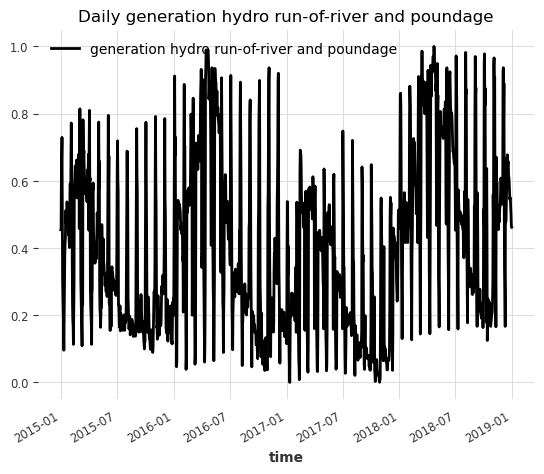

In [4]:

filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_day_avg, "time", ["generation hydro run-of-river and poundage"]
        )
    )
).astype(np.float32)
series.plot()
plt.title("Daily generation hydro run-of-river and poundage")

In [5]:
train, val = series.split_after(pd.Timestamp("20170901"))

In [7]:
train

<TimeSeries (DataArray) (time: 976, component: 1, sample: 1)>
array([[[0.4542336 ]],

       [[0.45800978]],

       [[0.61315286]],

       [[0.66296136]],

       [[0.7292575 ]],

       [[0.5117494 ]],

       [[0.3051271 ]],

       [[0.24489416]],

       [[0.20545687]],

       [[0.1689182 ]],

...

       [[0.1129933 ]],

       [[0.11549303]],

       [[0.11833847]],

       [[0.08451229]],

       [[0.07403468]],

       [[0.10674396]],

       [[0.11158387]],

       [[0.10275503]],

       [[0.12142325]],

       [[0.15365386]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2014-12-31 2015-01-01 ... 2017-09-01
  * component  (component) object 'generation hydro run-of-river and poundage'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [17]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=128,
    model_name="nbeats_run",
)

In [18]:
model_nbeats.fit(train, val_series=val, verbose=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.1 M     Trainable params
2.7 K     Non-trainable params
8.1 M     Total params
32.368    Total estimated model params size (MB)


Epoch 0:   0%|          | 0/8 [00:00<?, ?it/s]                              

Epoch 99: 100%|██████████| 8/8 [00:00<00:00, 89.11it/s, train_loss=0.00108, val_loss=0.0225]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 8/8 [00:00<00:00, 88.67it/s, train_loss=0.00108, val_loss=0.0225]


NBEATSModel(generic_architecture=True, num_stacks=10, num_blocks=1, num_layers=4, layer_widths=512, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=30, output_chunk_length=7, n_epochs=100, nr_epochs_val_period=1, batch_size=128, model_name=nbeats_run)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), us

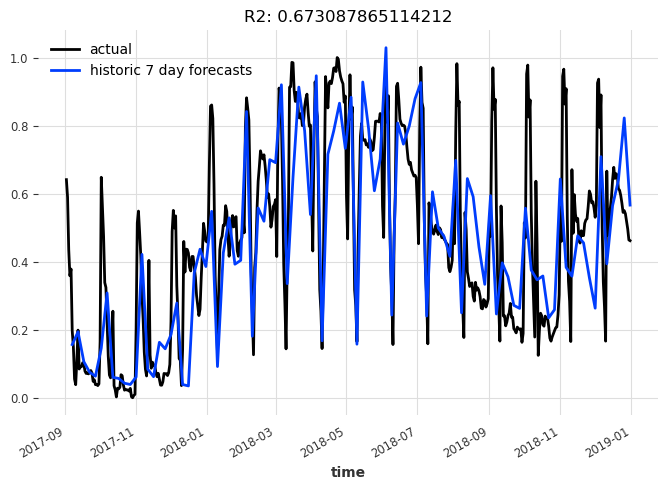

In [19]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=False,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("20170901"))